In [303]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.2


In [304]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-07-06 21:12:09--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.17’

train-data.tsv.17   100%[===================>] 349.84K  --.-KB/s    in 0.03s   

2024-07-06 21:12:09 (9.99 MB/s) - ‘train-data.tsv.17’ saved [358233/358233]

--2024-07-06 21:12:09--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.17’

valid-data.tsv.17   100%[=====

In [305]:
# Print the file path for verification (optional)
print(f"Reading data from: {train_file_path}")

try:
  # Read the TSV data using pandas
  train_ = pd.read_csv(train_file_path, sep="\t", names=['class', 'sms'])
  print("Data read successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {train_file_path}")

Reading data from: train-data.tsv
Data read successfully!


In [306]:
print(train_.head())  # Print the first few rows of the data


  class                                                sms
0   ham  ahhhh...just woken up!had a bad dream about u ...
1   ham                           you can never do nothing
2   ham  now u sound like manky scouse boy steve,like! ...
3   ham  mum say we wan to go then go... then she can s...
4   ham  never y lei... i v lazy... got wat? dat day ü ...


In [307]:
# Now for the test one
print(f"Reading data from: {test_file_path}")

try:
  # Read the TSV data using pandas
  test_ = pd.read_csv(test_file_path, sep="\t", names=['class', 'sms'])
  print("Data read successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {test_file_path}")

print(test_.head())

Reading data from: valid-data.tsv
Data read successfully!
  class                                                sms
0   ham  i am in hospital da. . i will return home in e...
1   ham         not much, just some textin'. how bout you?
2   ham  i probably won't eat at all today. i think i'm...
3   ham  don‘t give a flying monkeys wot they think and...
4   ham                                who are you seeing?


## PREPROCESSING

In [308]:
#PREPROCESSING TEXT
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

lemmatizer = WordNetLemmatizer()

def preprocessing(sms):

    words = word_tokenize(sms) #Tokenization
    #to Lowercase
    words = [word.lower() for word in words if word.isalnum()]
    #Remove Stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    #Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed = ' '.join(words)

    return preprocessed # Return the preprocessed text as a string


train_['sms'] = [preprocessing(text) for text in train_['sms']]
test_['sms'] = [preprocessing(text) for text in test_['sms']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [309]:
train_.head()

,class,sms
0,ham,ahhhh woken bad dream u tho dont like u right ...
1,ham,never nothing
2,ham,u sound like manky scouse boy steve like trave...
3,ham,mum say wan go go shun bian watch da glass exh...
4,ham,never lei v lazy got wat dat day ü send da url...


In [310]:
#Shuffle datasets
train_ = train_.sample(frac=1, random_state=42)
test_ = test_.sample(frac=1, random_state=42)

#SPLIT DATASETS IN X AND Y
x_train = train_['sms']
y_train = train_['class']

x_test = test_['sms']
y_test = test_['class']

print(x_test[:5])

1029                  point hangin mr right makin u happy
168     glad went well come 11 plenty time claire go work
1374            yes possible dint try pls dont tell one k
988     thats cool sometimes slow gentle sonetimes rou...
453     auction round highest bid next maximum bid bid...
Name: sms, dtype: object


## FEATURE EXTRACTION

In [311]:
!pip install --upgrade tensorflow keras  #To prevent problems for previous tf versions

In [312]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000  # Maximum number of words in vocabulary
max_len = 700  # Maximum length of an SMS text

# Create a tokenizer
tokenizer = Tokenizer(num_words=vocab_size)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(x_train)   #ALL THE DATA SET HAS TO BE TOKENIZED with this tokenizer based on x_trains SO IT IS CONSISTENT


In [313]:
# Convert texts to sequences of integer indices (Training data)
sequences = tokenizer.texts_to_sequences(x_train)

sequences = pad_sequences(sequences, maxlen=max_len)

print(sequences[:5])

[[  0   0   0 ...   0 645 234]
 [  0   0   0 ... 875 402 187]
 [  0   0   0 ... 150  23  53]
 [  0   0   0 ... 404  32 404]
 [  0   0   0 ... 602 991 172]]


## MODEL BUILDING AND TESTING

In [314]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop  # Import optimizer

# hyperparameters (adjust as needed)
embedding_dim = 50  # Dimensionality of word vectors
lstm_units = 64  # Number of units in the LSTM layer

# Model definition
i = Input(shape=(max_len,))  # Input layer
# Embedding layer
x = Embedding(vocab_size, embedding_dim, input_length=max_len)(i)
x = LSTM(lstm_units, return_sequences=False)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=i, outputs=output)

# Model compilation
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_13 (Embedding)             │ (None, 700, 50)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
# APPLY ONE HOT ENCODING TO Y_TRAIN FOR CONSISTENCY

# Define a dictionary to map labels to one-hot encoded vectors
label_mapping = {'ham': 0, 'spam': 1}

# Apply one-hot encoding using list comprehension
y_encoded = [label_mapping[label] for label in y_train]
y_encoded = np.array(y_encoded)
print(y_encoded)

[0 0 0 ... 0 1 1]


### Train model

In [316]:
train = model.fit(sequences, y_encoded,
              batch_size=128, epochs=10,
              validation_split=0.2,
              callbacks=[tf.keras.callbacks.EarlyStopping(
                  monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8242 - loss: 0.4768 - val_accuracy: 0.8876 - val_loss: 0.2812
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9014 - loss: 0.2548 - val_accuracy: 0.9522 - val_loss: 0.1912
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9643 - loss: 0.1534 - val_accuracy: 0.9701 - val_loss: 0.1177
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9768 - loss: 0.0881 - val_accuracy: 0.9737 - val_loss: 0.1027
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9781 - loss: 0.0759 - val_accuracy: 0.9785 - val_loss: 0.0856
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9836 - loss: 0.0573 - val_accuracy: 0.9785 - val_loss: 0.0754
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9887 - loss: 0.0431 - val_accuracy: 0.9665 - val_loss: 0.1104


In [317]:
# Convert texts to sequences of integer indices (TESTING DATA)

t_sequences = tokenizer.texts_to_sequences(x_test)  #Unpack just one value is vocab_size =/= None

t_sequences = pad_sequences(t_sequences, maxlen=max_len)

# Apply one-hot encoding TO Y_TEST
y_t_encoded = [label_mapping[label] for label in y_test]
y_t_encoded = np.array(y_t_encoded)

### EVALUATE MODEL

In [318]:
evaluation = model.evaluate(t_sequences, y_t_encoded, batch_size=128, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

11/11 - 9s - 843ms/step - accuracy: 0.9670 - loss: 0.1036

Test loss : 10.356950014829636 %
Test accuracy : 96.69540524482727 %


In [319]:
predicted_y = model.predict(t_sequences)  #Predicting whole test data so we can se more clearly the performance
print(predicted_y[:5])

44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step
[[0.00350434]
 [0.00381374]
 [0.00236133]
 [0.01919858]
 [0.55139285]]


In [320]:
# ONE HOT ENCODING PREDICTED RESULTS

predicted_y = [0 if val < 0.5 else 1 for val in predicted_y]
print(predicted_y[:5])

[0, 0, 0, 0, 1]


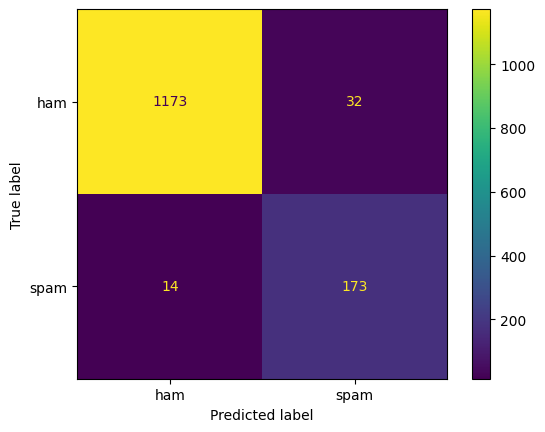

In [321]:
# confusion matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_t_encoded, predicted_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ['ham', 'spam'])

cm_display.plot()
plt.show()

## NOW PREDICTING

In [322]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  # Preprocess the text
  processed_text = preprocessing(pred_text)
  processed_text = [processed_text]

  sequences = tokenizer.texts_to_sequences(processed_text)  #Unpack just one value is vocab_size =/= None
  sequences = pad_sequences(sequences, maxlen=max_len)

  prediction = model.predict(sequences)
  predicted = ['ham' if val < 0.5 else 'spam' for val in prediction]

  return [prediction[0][0], predicted[0]]

# Test
text_ex = "How are you?."
prediction = predict_message(text_ex)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[0.004371743, 'ham']


In [323]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
You passed the challenge. Great job!
